In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
# URL of the CSV file (example)
url = "https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2023-24/gws/merged_gw.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(url)

In [85]:
players_url="https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/refs/heads/master/data/2023-24/players_raw.csv"
players_pd_all=pd.read_csv(players_url)
players_pd=players_pd_all[['first_name', 'second_name', 'team']]
players_pd.head(25)

,first_name,second_name,team
0,Folarin,Balogun,1
1,Cédric,Alves Soares,1
2,Mohamed,Elneny,1
3,Fábio,Ferreira Vieira,1
4,Gabriel,dos Santos Magalhães,1
5,Kai,Havertz,1
6,Gabriel,Fernando de Jesus,1
7,Jorge Luiz,Frello Filho,1
8,Jakub,Kiwior,1
9,Marcus,Oliveira Alencar,1


In [83]:
temp=pd.read_csv("https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/refs/heads/master/data/2020-21/players_raw.csv")
temp.columns
#team_h_dif is the difficultly of the home team player

Index(['assists', 'bonus', 'bps', 'chance_of_playing_next_round',
       'chance_of_playing_this_round', 'clean_sheets', 'code',
       'corners_and_indirect_freekicks_order',
       'corners_and_indirect_freekicks_text', 'cost_change_event',
       'cost_change_event_fall', 'cost_change_start', 'cost_change_start_fall',
       'creativity', 'creativity_rank', 'creativity_rank_type',
       'direct_freekicks_order', 'direct_freekicks_text', 'dreamteam_count',
       'element_type', 'ep_next', 'ep_this', 'event_points', 'first_name',
       'form', 'goals_conceded', 'goals_scored', 'ict_index', 'ict_index_rank',
       'ict_index_rank_type', 'id', 'in_dreamteam', 'influence',
       'influence_rank', 'influence_rank_type', 'minutes', 'news',
       'news_added', 'now_cost', 'own_goals', 'penalties_missed',
       'penalties_order', 'penalties_saved', 'penalties_text', 'photo',
       'points_per_game', 'red_cards', 'saves', 'second_name',
       'selected_by_percent', 'special', 'squad_

In [87]:
def fetch_data(url, players_url, fix_url):
    df = pd.read_csv(url, encoding="latin1")
    df2 = pd.read_csv(players_url)
    df[['first_name', 'second_name']] = df['name'].str.split(' ', n=1, expand=True)
    df2=df2[['first_name', 'second_name', 'team', 'web_name']]
    if 'expected_assists' in df.columns:
        df.drop('expected_assists', axis=1, inplace=True)
        df.drop('expected_goal_involvements', axis=1, inplace=True)
        df.drop('expected_goals', axis=1, inplace=True)
        df.drop('expected_goals_conceded', axis=1, inplace=True)
        df.drop('starts', axis=1, inplace=True)

    merged_df=pd.merge(df, df2, on=['first_name', 'second_name'], how='inner')
    gks=merged_df.loc[(df['position']=="GK")]
    defs=merged_df.loc[(df['position']=="DEF") ]
    mids=merged_df.loc[(df['position']=="MID")]
    fwds=merged_df.loc[(df['position']=="FWD") ]


    print(df.columns)

    return gks, defs, mids, fwds

In [61]:
gks=[]
defs=[]
mids=[]
fwds=[]
gks_test=[]
defs_test=[]
mids_test=[]
fwds_test=[]

In [63]:
for i in range(20,23):
    gw_url = "https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/20" + str(i) + "-" + str(i+1) + "/gws/merged_gw.csv"
    players_url="https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/20" + str(i) + "-" + str(i+1) + "/players_raw.csv"
    fixtures_url="https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/20" + str(i) + "-" + str(i+1) + "/fixtures.csv"
    gks_temp, defs_temp, mids_temp, fwds_temp=fetch_data(gw_url, players_url, fixtures_url)
    if i < 22:
        gks.append(gks_temp)
        defs.append(defs_temp)
        mids.append(gks_temp)
        fwds.append(fwds_temp)
    else:
        gks_test.append(gks_temp)
        defs_test.append(defs_temp)
        mids_test.append(gks_temp)
        fwds_test.append(fwds_temp)

https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2020-21/gws/merged_gw.csv
Index(['name', 'position', 'team', 'xP', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes',
       'opponent_team', 'own_goals', 'penalties_missed', 'penalties_saved',
       'red_cards', 'round', 'saves', 'selected', 'team_a_score',
       'team_h_score', 'threat', 'total_points', 'transfers_balance',
       'transfers_in', 'transfers_out', 'value', 'was_home', 'yellow_cards',
       'GW', 'first_name', 'second_name'],
      dtype='object')
https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2021-22/gws/merged_gw.csv
Index(['name', 'position', 'team', 'xP', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes'

In [13]:
gks_test=gks_test[0]
defs_test=defs_test[0]
mids_test=mids_test[0]
fwds_test=fwds_test[0]

In [27]:
pd.set_option('display.max_columns', None)
gks_test.loc[gks_test['name'] == "Aaron Ramsdale"]

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
211,Aaron Ramsdale,GK,Arsenal,3.6,0,0,25,1,0.0,15,1,0,0,1.9,19.0,2022-08-05T19:00:00Z,90,7,0,0,0,0,1,2,1128297,2,0,0.0,6,0,0,0,50,False,0,1
787,Aaron Ramsdale,GK,Arsenal,4.0,0,0,10,0,0.0,15,11,2,0,1.2,11.6,2022-08-13T14:00:00Z,90,10,0,0,0,0,2,1,1369348,2,4,0.0,1,31287,93632,62345,50,True,0,2
1372,Aaron Ramsdale,GK,Arsenal,5.3,0,0,20,1,0.0,15,21,0,0,0.8,7.6,2022-08-20T16:30:00Z,90,3,0,0,0,0,3,1,1366505,3,0,0.0,6,-61359,88334,149693,50,False,0,3
1968,Aaron Ramsdale,GK,Arsenal,4.8,0,0,12,0,0.0,15,31,1,0,1.9,18.8,2022-08-27T16:30:00Z,90,9,0,0,0,0,4,2,1422476,1,2,0.0,2,-12169,88190,100359,50,True,0,4
2570,Aaron Ramsdale,GK,Arsenal,3.9,0,0,13,0,0.0,15,41,1,0,1.7,17.4,2022-08-31T18:30:00Z,90,2,0,0,0,0,5,2,1407588,1,2,0.0,2,-53340,48276,101616,50,True,0,5
3182,Aaron Ramsdale,GK,Arsenal,2.0,0,0,14,0,0.0,15,56,3,0,2.5,25.2,2022-09-04T15:30:00Z,90,14,0,0,0,0,6,3,1164227,1,3,0.0,2,-250290,17642,267932,50,False,0,6
3736,Aaron Ramsdale,GK,Arsenal,3.5,0,0,24,1,0.0,15,72,0,0,1.8,17.8,2022-09-18T11:00:00Z,90,4,0,0,0,0,8,2,1117890,3,0,0.0,6,-33636,26476,60112,49,False,0,8
4249,Aaron Ramsdale,GK,Arsenal,3.3,0,0,12,0,0.0,15,81,1,0,1.9,19.2,2022-10-01T11:30:00Z,90,18,0,0,0,0,9,2,1109375,1,3,0.0,2,-32360,39331,71691,49,True,0,9
4889,Aaron Ramsdale,GK,Arsenal,2.5,0,0,15,0,0.0,15,91,2,0,1.3,12.6,2022-10-09T15:30:00Z,90,12,0,0,0,0,10,2,1098374,2,3,0.0,1,-21961,36722,58683,49,True,0,10
5531,Aaron Ramsdale,GK,Arsenal,5.3,0,3,32,1,0.0,15,104,0,0,3.5,34.8,2022-10-16T13:00:00Z,90,11,0,0,0,0,11,4,1120191,1,0,0.0,10,10087,52485,42398,49,False,0,11


In [77]:
fix_pd=pd.read_csv("https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/refs/heads/master/data/2022-23/fixtures.csv")
fix_pd.columns

Index(['code', 'event', 'finished', 'finished_provisional', 'id',
       'kickoff_time', 'minutes', 'provisional_start_time', 'started',
       'team_a', 'team_a_score', 'team_h', 'team_h_score', 'stats',
       'team_h_difficulty', 'team_a_difficulty', 'pulse_id'],
      dtype='object')

In [79]:
gks_test

[                      name position          team_x   xP  assists_x  bonus_x  \
 10           Wesley Fofana      DEF       Leicester  1.9          0        0   
 14           Sam Greenwood      FWD           Leeds  0.5          0        0   
 20     Carlos Ribeiro Dias      MID   Nott'm Forest  0.5          0        0   
 24       Rodrigo Hernandez      MID        Man City  3.2          0        0   
 27           Jack Grealish      MID        Man City  3.4          0        0   
 ...                    ...      ...             ...  ...        ...      ...   
 22282          Leon Bailey      MID     Aston Villa  2.0          0        0   
 22319    Christian Benteke      FWD  Crystal Palace  0.0          0        0   
 22323      Elliot Anderson      MID       Newcastle  2.8          1        2   
 22343      Filip Marschall       GK     Aston Villa  0.0          0        0   
 22348         Reiss Nelson      MID         Arsenal  1.0          0        0   
 
        bps_x  clean_sheet

In [17]:
gks_df=pd.concat(gks, ignore_index=True)
defs_df=pd.concat(defs, ignore_index=True)
mids_df=pd.concat(mids, ignore_index=True)
fwds_df=pd.concat(fwds, ignore_index=True)

In [19]:
from sklearn.model_selection import train_test_split

In [21]:
y_gks=gks_df['total_points']
y_defs=defs_df['total_points']
y_mids=mids_df['total_points']
y_fwds=fwds_df['total_points']

x_gks=gks_df.drop(['total_points', 'name', 'position', 'team', 'kickoff_time'], axis =1)
x_defs=defs_df.drop(['total_points', 'name', 'position', 'team', 'kickoff_time'], axis =1)
x_mids=mids_df.drop(['total_points', 'name', 'position', 'team', 'kickoff_time'], axis =1)
x_fwds=fwds_df.drop(['total_points', 'name', 'position', 'team', 'kickoff_time'], axis =1)

In [23]:
y_gks_test=gks_test['total_points']
y_defs_test=defs_test['total_points']
y_mids_test=mids_test['total_points']
y_fwds_test=fwds_test['total_points']

x_gks_test=gks_test.drop(['total_points', 'name', 'position', 'team', 'kickoff_time'], axis =1)
x_defs_test=defs_test.drop(['total_points', 'name', 'position', 'team', 'kickoff_time'], axis =1)
x_mids_test=mids_test.drop(['total_points', 'name', 'position', 'team', 'kickoff_time'], axis =1)
x_fwds_test=fwds_test.drop(['total_points', 'name', 'position', 'team', 'kickoff_time'], axis =1)

In [241]:
y_gks

0       1
1       0
2       2
3       1
4       0
       ..
5572    0
5573    2
5574    0
5575    1
5576    0
Name: total_points, Length: 5577, dtype: int64

In [69]:
x_gks[['influence', 'minutes']].head(5)

,influence,minutes
0,18.2,90
1,0.0,0
2,22.6,90
3,3.8,90
4,0.0,0


In [59]:
x_gks['fixture'].head(20)

0     8
1     3
2     1
3     3
4     2
5     1
6     2
7     7
8     5
9     6
10    5
11    6
12    2
13    2
14    3
15    1
16    4
17    3
18    7
19    4
Name: fixture, dtype: int64

In [25]:
from sklearn.linear_model import LinearRegression

In [43]:
reg = LinearRegression().fit(x_gks, y_gks)

In [277]:
reg.feature_names_in_

array(['xP', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'element', 'fixture', 'goals_conceded', 'goals_scored',
       'ict_index', 'influence', 'minutes', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'round',
       'saves', 'selected', 'team_a_score', 'team_h_score', 'threat',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'GW'], dtype=object)

In [279]:
print(x_gks_test.columns)

Index(['xP', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'element', 'fixture', 'goals_conceded', 'goals_scored', 'ict_index',
       'influence', 'minutes', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'round', 'saves',
       'selected', 'team_a_score', 'team_h_score', 'threat',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'GW'],
      dtype='object')


In [281]:
y_lr_train_pred_gks = reg.predict(x_gks)
y_lr_test_pred_gks = reg.predict(x_gks_test)

In [283]:

from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse_gks = mean_squared_error(y_gks, y_lr_train_pred_gks)
lr_train_r2_gks = r2_score(y_gks, y_lr_train_pred_gks)

lr_test_mse_gks = mean_squared_error(y_gks_test, y_lr_test_pred_gks)
lr_test_r2_gks = r2_score(y_gks_test, y_lr_test_pred_gks)

In [285]:

print('LR MSE (Train): ', lr_train_mse_gks)
print('LR R2 (Train): ', lr_train_r2_gks)
print('LR MSE (Test): ', lr_test_mse_gks)
print('LR R2 (Test): ', lr_test_r2_gks)

LR MSE (Train):  0.02938009006805471
LR R2 (Train):  0.9939337374499555
LR MSE (Test):  0.03177121547629019
LR R2 (Test):  0.9937522910409899


Text(0.5, 0, 'Experimental LogS')

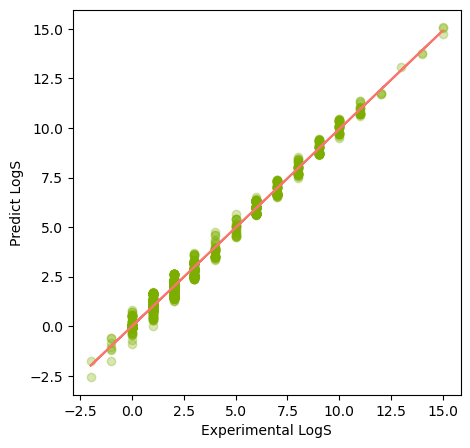

In [289]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_gks, y=y_lr_train_pred_gks, c="#7CAE00" ,alpha=0.3)

z = np.polyfit(y_gks, y_lr_train_pred_gks, 1)
p = np.poly1d(z)

plt.plot(y_gks, p(y_gks), '#F8766D')
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')

## Fwds

In [27]:
from sklearn.linear_model import LinearRegression

In [29]:
reg_fwds = LinearRegression().fit(x_fwds, y_fwds)

In [51]:
y_lr_train_pred_fwds = reg_fwds.predict(x_fwds)
y_lr_test_pred_fwds = reg_fwds.predict(x_fwds_test)

In [53]:

from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse_fwds = mean_squared_error(y_fwds, y_lr_train_pred_fwds)
lr_train_r2_fwds = r2_score(y_fwds, y_lr_train_pred_fwds)

lr_test_mse_fwds = mean_squared_error(y_fwds_test, y_lr_test_pred_fwds)
lr_test_r2_fwds = r2_score(y_fwds_test, y_lr_test_pred_fwds)

In [55]:

print('LR MSE (Train): ', lr_train_mse_fwds)
print('LR R2 (Train): ', lr_train_r2_fwds)
print('LR MSE (Test): ', lr_test_mse_fwds)
print('LR R2 (Test): ', lr_test_r2_fwds)

LR MSE (Train):  0.0564453256282095
LR R2 (Train):  0.9918301476812402
LR MSE (Test):  0.07464804403982604
LR R2 (Test):  0.9899506516976805


Text(0.5, 0, 'Actual')

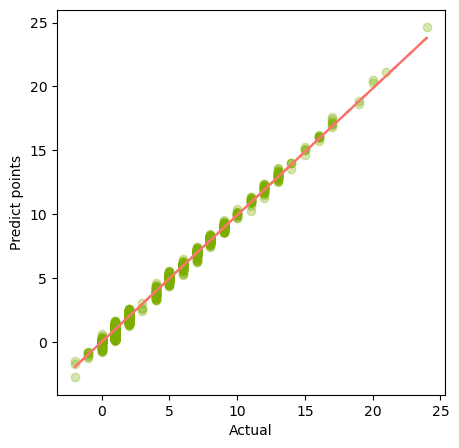

In [39]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_fwds, y=y_lr_train_pred_fwds, c="#7CAE00" ,alpha=0.3)

z = np.polyfit(y_fwds, y_lr_train_pred_fwds, 1)
p = np.poly1d(z)

plt.plot(y_fwds, p(y_fwds), '#F8766D')
plt.ylabel('Predict points')
plt.xlabel('Actual')

In [41]:
print(reg_fwds.coef_)
# array([0.2, 0.5])

print(reg_fwds.intercept_)
# 0.099

[ 1.92513747e-02  2.68319504e+00  9.36914102e-01  3.77331207e-02
  2.48345242e-02  5.43156376e-02 -4.23527520e-05  8.60757491e-05
  2.32474201e-02  3.27388740e+00 -5.83274269e-01  5.26366430e-02
  1.97918912e-02 -2.68035786e-04 -2.05996421e+00 -1.69506114e+00
 -1.74864435e+00 -2.59980119e+00  8.43400498e+00 -3.67928689e-01
 -1.77967190e-08 -6.23175144e-03 -7.10347119e-03  6.04949422e-02
 -1.60103433e+06  1.60103433e+06 -1.60103433e+06 -5.35179100e-05
  2.83112424e-04 -8.73485904e-01 -8.43584071e+00]
0.16247633132481676


In [23]:
from sklearn.linear_model import SGDRegressor

In [29]:
model = SGDRegressor(max_iter=2000, tol=None)

In [31]:
model.partial_fit(X_train_gks, y_train_gks)

SGDRegressor(max_iter=2000, tol=None)

In [33]:
# URL of the CSV file (example)
url = "https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2022-23/gws/merged_gw.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(url)

gks=df.loc[df['position']=="GK"]
defs=df.loc[df['position']=="DEF"]
mids=df.loc[df['position']=="MID"]
fwds=df.loc[df['position']=="FWD"]

y_gks=gks['total_points']
y_defs=defs['total_points']
y_mids=mids['total_points']
y_fwds=fwds['total_points']

x_gks=gks.drop(['total_points', 'name', 'position', 'team', 'starts', 'kickoff_time'], axis =1)
x_defs=defs.drop(['total_points', 'name', 'position', 'team', 'starts', 'kickoff_time'], axis =1)
x_mids=mids.drop(['total_points', 'name', 'position', 'team', 'starts', 'kickoff_time'], axis =1)
x_fwds=fwds.drop(['total_points', 'name', 'position', 'team', 'starts', 'kickoff_time'], axis =1)

X_train_gks, X_test_gks, y_train_gks, y_test_gks = train_test_split(
  x_gks, y_gks, random_state=104,test_size=0.2, shuffle=False)

In [34]:
model.partial_fit(X_train_gks, y_train_gks)

SGDRegressor(max_iter=2000, tol=None)

In [53]:
X_train_gks

,xP,assists,bonus,bps,clean_sheets,creativity,element,expected_assists,expected_goal_involvements,expected_goals,...,team_a_score,team_h_score,threat,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
10,1.5,0,0,0,0,0.0,451,0.0,0.0,0.0,...,1,4,0.0,0,0,0,40,True,0,1
14,5.5,0,0,11,0,0.0,281,0.0,0.0,0.0,...,2,2,0.0,0,0,0,55,False,0,1
20,0.5,0,0,0,0,0.0,102,0.0,0.0,0.0,...,2,1,0.0,0,0,0,40,False,0,1
24,0.7,0,0,11,0,0.0,213,0.0,0.0,0.0,...,2,2,0.0,0,0,0,45,True,0,1
27,1.5,0,0,0,0,0.0,353,0.0,0.0,0.0,...,0,2,0.0,0,0,0,40,True,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21344,0.0,0,0,0,0,0.0,717,0.0,0.0,0.0,...,1,2,0.0,101,165,64,40,False,0,32
21347,0.0,0,0,0,0,0.0,644,0.0,0.0,0.0,...,0,0,0.0,5,97,92,40,True,0,32
21348,0.0,0,0,0,0,0.0,627,0.0,0.0,0.0,...,0,0,0.0,-10,0,10,40,False,0,32
21352,0.5,0,0,0,0,0.0,289,0.0,0.0,0.0,...,2,3,0.0,-136,191,327,40,True,0,32


In [37]:
y_pred = model.predict(X_test_gks)

In [49]:
y_pred

array([-1.21816645e+19, -1.08096990e+19, -2.24312309e+17, -5.17209638e+19,
       -3.76967980e+17, -9.45825972e+19, -2.44558553e+20, -1.57209775e+21,
       -2.06703272e+19, -6.07117484e+17, -1.14416633e+21, -2.37682905e+20,
       -1.18639806e+19, -5.52055589e+19, -2.94212531e+20, -1.05821561e+19,
       -7.08847006e+19, -1.18513959e+18, -2.89040100e+19, -5.54673071e+17,
       -1.19204416e+18, -3.96048572e+20, -2.63979064e+19, -2.99040125e+18,
       -3.21980748e+19, -7.84525575e+20, -4.33612358e+20, -1.17479570e+21,
       -1.35472687e+21, -3.00639113e+18, -1.20081089e+21, -1.09644824e+20,
       -8.80878342e+17, -9.43702095e+18, -5.10338068e+19, -4.12419352e+18,
       -8.80896275e+18, -3.17487387e+17, -1.20044279e+18, -8.44993090e+16,
       -7.27792291e+20, -2.02222248e+18, -2.03177515e+18, -5.18702249e+19,
       -1.10428313e+20, -2.83028480e+20, -4.98351213e+20, -9.26143390e+17,
       -1.02033094e+20, -3.65655176e+18, -8.17985418e+17, -9.14158062e+19,
       -1.70882158e+18, -

In [43]:

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test_gks, y_pred)
r2 = r2_score(y_test_gks, y_pred)



In [45]:
mse

1.7030125561088398e+41

In [47]:
r2

-4.391584760684341e+40